In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [3]:
# Reading the data from Excel
data = pd.read_excel('PSP_Jan_Feb_2019.xlsx')

# Looking at the first 5 columns
print(data.head())

   Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners  


In [4]:
# Droping the first column
data = data.drop(data.columns[0], axis=1)

print(data.head())


                 tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  
0    Visa  
1    Visa  
2  Diners  
3  Diners  
4  Diners  


In [5]:
# Checking for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


In [6]:
#Print the number of rows
print("Number of rows is : ",len(data))

Number of rows is :  50410


In [7]:
data_type=data.dtypes
print(f"Data Type Information:\n{data_type}")

Data Type Information:
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


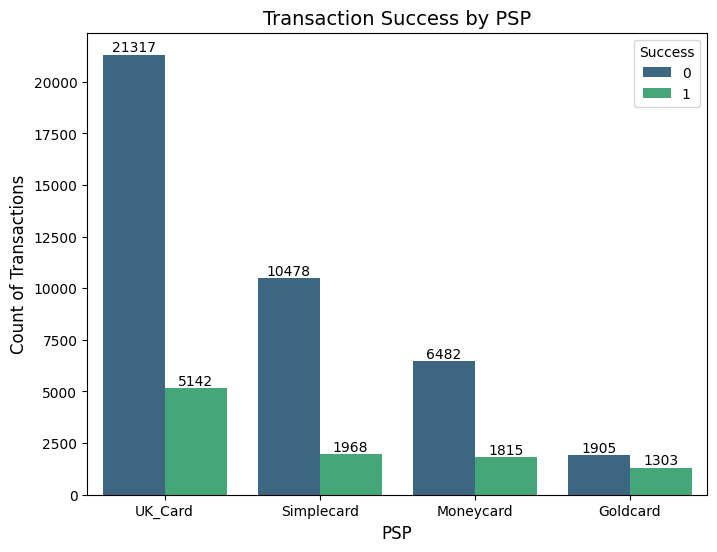

In [8]:
# Transation success by PSP:

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=data, x='PSP', hue='success', palette="viridis")

# Add counts above the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add title and labels
plt.title('Transaction Success by PSP', fontsize=14)
plt.xlabel('PSP', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.legend(title='Success', loc='upper right')
plt.show()

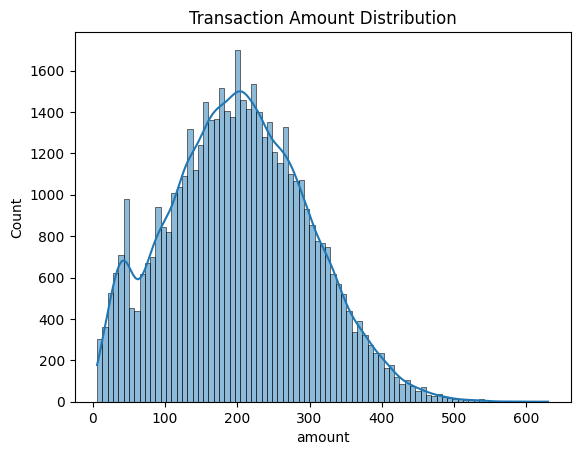

In [9]:
# Transaction amount distribution 
sns.histplot(data['amount'], kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

C:\Users\aliaz\AppData\Local\Temp\ipykernel_19040\160666386.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='3D_secured', y='success', palette="viridis")


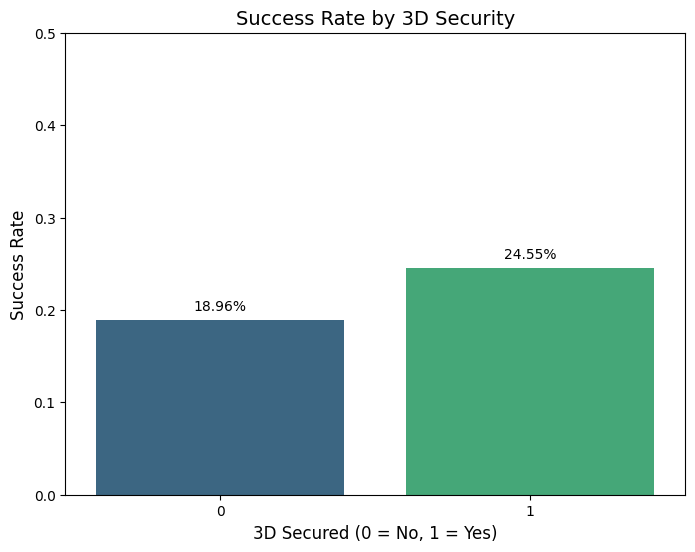

In [10]:
# Success rate by 3D security
success_rate = data.groupby('3D_secured')['success'].mean().reset_index()

# Plot success rates
plt.figure(figsize=(8, 6))
sns.barplot(data=success_rate, x='3D_secured', y='success', palette="viridis")

# Add labels above bars to show success rates
for index, row in success_rate.iterrows():
    plt.text(
        x=index, 
        y=row['success'] + 0.01, 
        s=f"{row['success']:.2%}",  # Convert to percentage
        ha='center', fontsize=10
    )

# Add title and labels
plt.title('Success Rate by 3D Security', fontsize=14)
plt.xlabel('3D Secured (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 0.5)  # Ensure y-axis shows percentage scale
plt.show()


In [11]:

# Count transactions per country
country_distribution = data['country'].value_counts()

print(country_distribution)

country
Germany        30233
Switzerland    10338
Austria         9839
Name: count, dtype: int64


C:\Users\aliaz\AppData\Local\Temp\ipykernel_19040\1204947401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=country_distribution.index, y=country_distribution.values, palette="viridis")


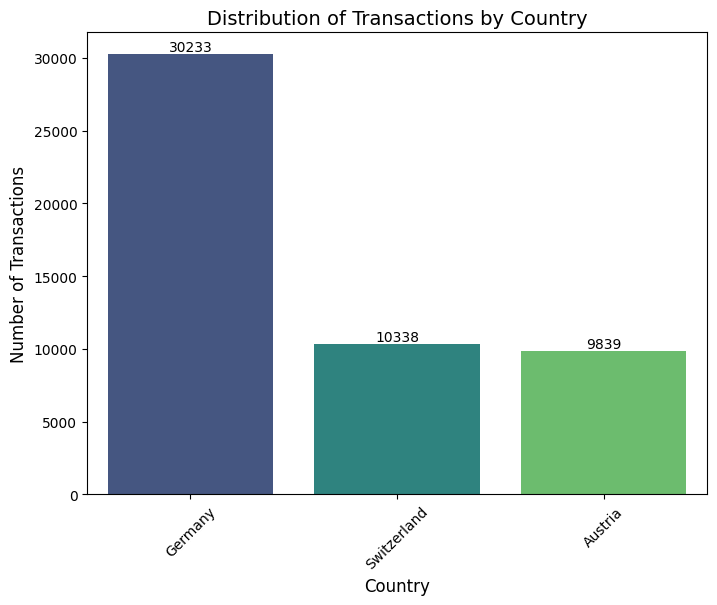

In [12]:
# Bar chart for country distribution
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=country_distribution.index, y=country_distribution.values, palette="viridis")

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add title and labels
plt.title("Distribution of Transactions by Country", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.show()

C:\Users\aliaz\AppData\Local\Temp\ipykernel_19040\3247567382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=card_distribution.index, y=card_distribution.values, palette="viridis")


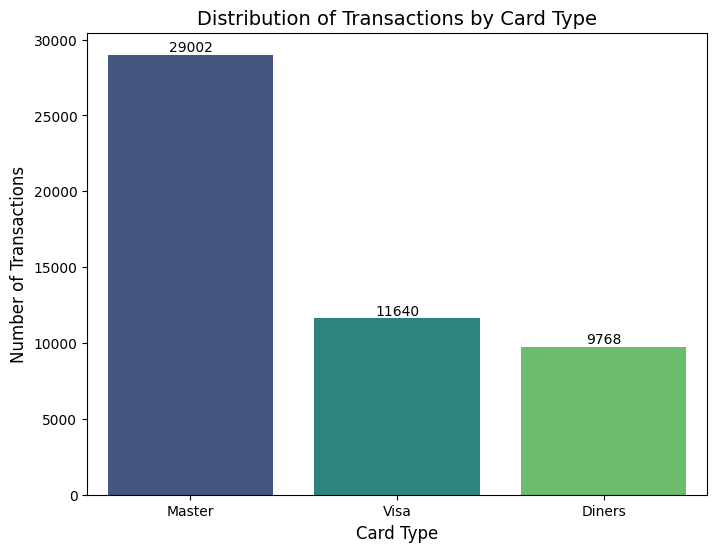

In [13]:
# Bar chart for card distribution 
# Count transactions by card type
card_distribution = data['card'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=card_distribution.index, y=card_distribution.values, palette="viridis")

# Add counts on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add title and labels
plt.title("Distribution of Transactions by Card Type", fontsize=14)
plt.xlabel("Card Type", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=0)  # Ensure labels are horizontal
plt.show()


In [14]:
# Sorting the data by timestamp
data = data.sort_values(by='tmsp')

# Grouping multiple payment attempts within 1 minute
data['attempt_group'] = ((data['tmsp'].diff().dt.total_seconds() < 60) & 
                         (data['amount'] == data['amount'].shift(1)) & 
                         (data['country'] == data['country'].shift(1))).cumsum()

print("\nSample of grouped transactions:")
print(data[['tmsp', 'country', 'amount', 'attempt_group']].head(10))


Sample of grouped transactions:
                 tmsp      country  amount  attempt_group
0 2019-01-01 00:01:11      Germany      89              0
1 2019-01-01 00:01:17      Germany      89              1
2 2019-01-01 00:02:49      Germany     238              1
3 2019-01-01 00:03:13      Germany     238              2
4 2019-01-01 00:04:33      Austria     124              2
5 2019-01-01 00:06:41  Switzerland     282              2
6 2019-01-01 00:07:19  Switzerland     282              3
7 2019-01-01 00:08:46      Germany     117              3
8 2019-01-01 00:09:56  Switzerland     174              3
9 2019-01-01 00:10:49  Switzerland     174              4


In [15]:
# Sorting the data by timestamp
data = data.sort_values(by='tmsp')

# Grouping multiple payment attempts within 1 minute
data['attempt_group'] = ((data['tmsp'].diff().dt.total_seconds() < 60) & 
                         (data['amount'] == data['amount'].shift(1)) & 
                         (data['country'] == data['country'].shift(1))).cumsum()

print("\nSample of grouped transactions:")
print(data[['tmsp', 'country', 'amount', 'attempt_group']].head(10))


Sample of grouped transactions:
                 tmsp      country  amount  attempt_group
0 2019-01-01 00:01:11      Germany      89              0
1 2019-01-01 00:01:17      Germany      89              1
2 2019-01-01 00:02:49      Germany     238              1
3 2019-01-01 00:03:13      Germany     238              2
4 2019-01-01 00:04:33      Austria     124              2
5 2019-01-01 00:06:41  Switzerland     282              2
6 2019-01-01 00:07:19  Switzerland     282              3
7 2019-01-01 00:08:46      Germany     117              3
8 2019-01-01 00:09:56  Switzerland     174              3
9 2019-01-01 00:10:49  Switzerland     174              4


In [16]:
# Extracting useful information from the timestamp column
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Encoding categorical variables
# Encode the PSP and card columns for model building
label_encoder = LabelEncoder()
data['PSP_encoded'] = label_encoder.fit_transform(data['PSP'])
data['card_encoded'] = label_encoder.fit_transform(data['card'])

In [17]:
# Ensure processed data folder exists
import os
os.makedirs('data/processed', exist_ok=True)

# Save the processed data as CSV
data.to_csv('processed_data.csv', index=False)


In [18]:
# Selecting the features and target variable
X = data[['amount', 'PSP_encoded', '3D_secured', 'hour', 'day_of_week']]
y = data['success']

# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(LogisticRegression(), X, y, cv=5)
print(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean() * 100:.2f}%")

# Logistic Regression model to predict transaction success
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nLogistic Regression Accuracy: {accuracy * 100:.2f}%")


print("\nConfusion Matrix for logistic Regression:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report for logistic Regression:")
print(classification_report(y_test, y_pred, zero_division=0))

with open('logistic_regression_results.txt', 'w') as f:
    f.write(f"Logistic Regression Cross-Validation Accuracy: {cv_scores_log_reg.mean() * 100:.2f}%\n")
    f.write(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%\n\n")
    f.write("Confusion Matrix:\n")
    f.write(str(confusion_matrix(y_test, y_pred)) + "\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred, zero_division=0))

Logistic Regression Cross-Validation Accuracy: 79.71%

Logistic Regression Accuracy: 80.54%

Confusion Matrix for logistic Regression:
[[12180     0]
 [ 2943     0]]

Classification Report for logistic Regression:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     12180
           1       0.00      0.00      0.00      2943

    accuracy                           0.81     15123
   macro avg       0.40      0.50      0.45     15123
weighted avg       0.65      0.81      0.72     15123



In [ ]:
# Hyperparameter Tuning for Random Forest Using RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, 30, 50, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, 
                                   verbose=2)
random_search.fit(X_train, y_train)

# Best Random Forest model after tuning
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print(f"\nBest Random Forest Accuracy after Randomized Tuning: {accuracy_best_rf * 100:.2f}%")
print(f"Best Parameters: {random_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Accuracy after Randomized Tuning: 80.82%
Best Parameters: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 5}


In [21]:
# Confusion Matrix and Classification Report for Random Forest
print("\nConfusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_best_rf))


Confusion Matrix for Random Forest:
[[12124    56]
 [ 2844    99]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89     12180
           1       0.64      0.03      0.06      2943

    accuracy                           0.81     15123
   macro avg       0.72      0.51      0.48     15123
weighted avg       0.78      0.81      0.73     15123




False Positives: 56
False Negatives: 2844


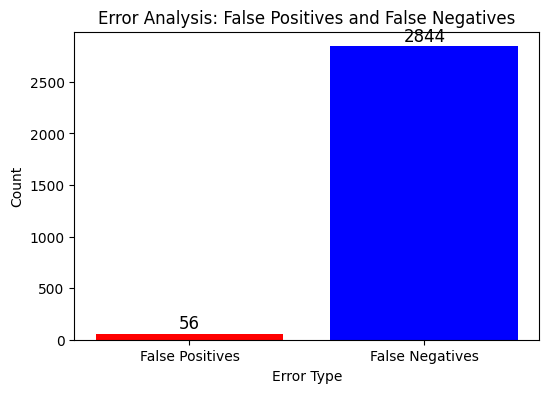

In [ ]:
# Error Analysis - False Positives and False Negatives
false_positives = X_test[(y_test == 0) & (y_pred_best_rf == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred_best_rf == 0)]

print(f"\nFalse Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

# Visualizing Error Analysis
error_counts = [len(false_positives), len(false_negatives)]
error_labels = ['False Positives', 'False Negatives']

plt.figure(figsize=(6,4))
plt.bar(error_labels, error_counts, color=['red', 'blue'])
plt.title('Error Analysis: False Positives and False Negatives')
plt.xlabel('Error Type')
plt.ylabel('Count')
# Adding text annotations
for i, count in enumerate(error_counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.savefig('error_analysis_fp_fn.png')  
plt.show()


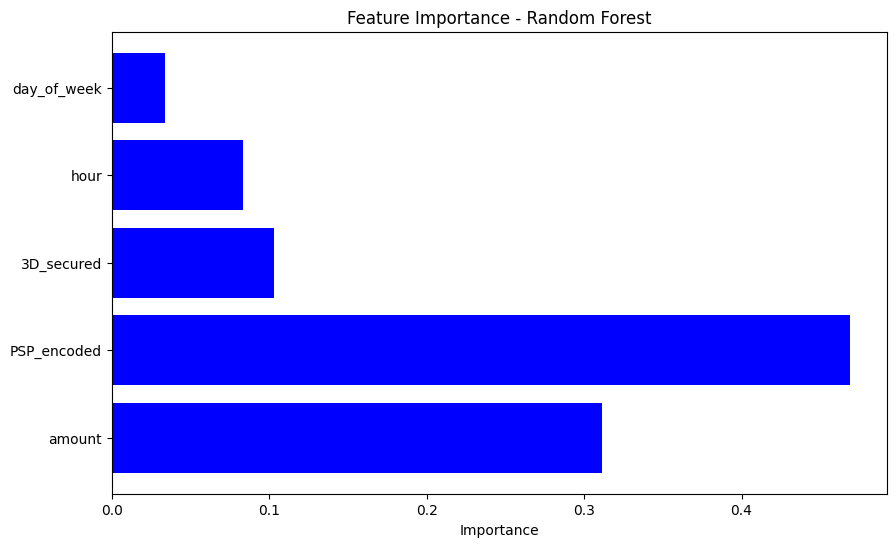

In [23]:
# Visualizing Feature Importance for Random Forest
importances = best_rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='blue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.show()

In [24]:
#  Model Results
print(f"\nLogistic Regression Accuracy: {accuracy * 100:.2f}%")
print(f"Random Forest Accuracy (after tuning): {accuracy_best_rf * 100:.2f}%")


Logistic Regression Accuracy: 80.54%
Random Forest Accuracy (after tuning): 80.82%


In [25]:
# Compute total success and failure counts for each PSP
psp_transaction_counts = data.groupby('PSP').agg(
    total_transactions=('success', 'size'),   # Total number of transactions per PSP
    successful_transactions=('success', 'sum') # Count of successful transactions per PSP
).reset_index()

# Derive the number of failed transactions for each PSP
psp_transaction_counts['failed_transactions'] = (
    psp_transaction_counts['total_transactions'] - psp_transaction_counts['successful_transactions']
)

print("PSP Transaction Summary (Success vs. Failure):")
print(psp_transaction_counts)

# Export PSP transaction summary to a CSV file
psp_transaction_counts.to_csv('psp_transaction_counts.csv', index=False)

PSP Transaction Summary (Success vs. Failure):
          PSP  total_transactions  successful_transactions  \
0    Goldcard                3208                     1303   
1   Moneycard                8297                     1815   
2  Simplecard               12446                     1968   
3     UK_Card               26459                     5142   

   failed_transactions  
0                 1905  
1                 6482  
2                10478  
3                21317  


In [26]:
# Specify the transaction fees for each PSP  
fees = { 
    'Moneycard': {'success_fee': 5, 'failure_fee': 2},
    'Goldcard': {'success_fee': 10, 'failure_fee': 5},
    'UK_Card': {'success_fee': 3, 'failure_fee': 1},
    'Simplecard': {'success_fee': 1, 'failure_fee': 0.5}
}

In [27]:
# Compute total transaction cost for each PSP based on success/failure rates and fee structure  
psp_transaction_counts['total_cost'] = psp_transaction_counts.apply(  
    lambda row: (  
        row['successful_transactions'] * fees[row['PSP']]['success_fee'] +  
        row['failed_transactions'] * fees[row['PSP']]['failure_fee']  
    ), axis=1  
)

print("\nTotal transaction cost for each PSP based on success and failure rates:")
print(psp_transaction_counts[['PSP', 'successful_transactions', 'failed_transactions', 'total_cost']])

# Export the PSP total cost calculations to a CSV file
psp_transaction_counts.to_csv('psp_total_costs.csv', index=False)


Total transaction cost for each PSP based on success and failure rates:
          PSP  successful_transactions  failed_transactions  total_cost
0    Goldcard                     1303                 1905     22555.0
1   Moneycard                     1815                 6482     22039.0
2  Simplecard                     1968                10478      7207.0
3     UK_Card                     5142                21317     36743.0


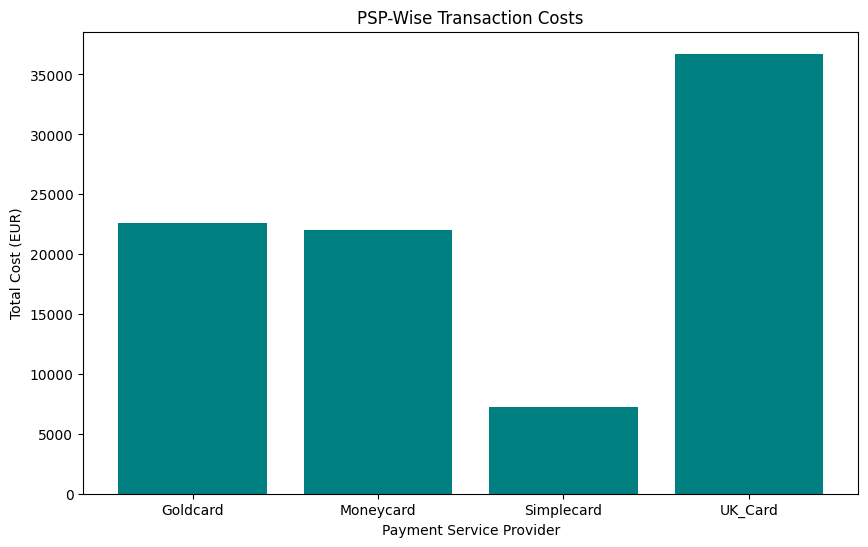

In [28]:
# Plot total transaction costs for each PSP  
plt.figure(figsize=(10, 6))  
plt.bar(psp_transaction_counts['PSP'], psp_transaction_counts['total_cost'], color='teal')  
plt.title('PSP-Wise Transaction Costs')  
plt.xlabel('Payment Service Provider')  
plt.ylabel('Total Cost (EUR)')  
plt.savefig('psp_transaction_costs.png')  
plt.show()  

In [ ]:
# Business Insights  

# Determine the most cost-effective PSP (lowest total cost)  
most_cost_effective_psp = psp_transaction_counts.loc[psp_transaction_counts['total_cost'].idxmin()]  

# Determine the most expensive PSP (highest total cost)  
most_expensive_psp = psp_transaction_counts.loc[psp_transaction_counts['total_cost'].idxmax()]  

print("\nCost-Efficiency Summary")  
print(f"The most cost-effective PSP is: {most_cost_effective_psp['PSP']} with a total cost of €
      {most_cost_effective_psp['total_cost']:.2f}")  
print(f"The most expensive PSP is: {most_expensive_psp['PSP']} with a total cost of €
      {most_expensive_psp['total_cost']:.2f}")  

print(f"\nRecommendation: To reduce costs and enhance efficiency, consider using {most_cost_effective_psp['PSP']} 
      for transactions wherever possible.")  


Cost-Efficiency Summary
The most cost-effective PSP is: Simplecard with a total cost of €7207.00
The most expensive PSP is: UK_Card with a total cost of €36743.00

Recommendation: To reduce costs and enhance efficiency, consider using Simplecard for transactions wherever possible.


# Recommendation System


In [30]:
print(X_train.columns)


Index(['amount', 'PSP_encoded', '3D_secured', 'hour', 'day_of_week'], dtype='object')


In [31]:
# Preparing the transaction details including PSP_encoded  
amount = 150  # Amount in euros  
is_3D_secured = 1  # 1 = 3D secured, 0 = not 3D secured  
hour = 9  # Hour of the day (24-hour format)  
day_of_week = 5  # Day of the week (0 = Monday, 6 = Sunday)  

psp_encoded = 0  # Initial placeholder for PSP_encoded

# Preparing the input features for the model
transaction_data = pd.DataFrame({
    'amount': [amount],
    'PSP_encoded': [psp_encoded],  
    '3D_secured': [is_3D_secured],
    'hour': [hour],
    'day_of_week': [day_of_week]
})

print("Transaction Data  Prediction:")
print(transaction_data)

Transaction Data  Prediction:
   amount  PSP_encoded  3D_secured  hour  day_of_week
0     150            0           1     9            5


In [32]:
# Predicting the most suitable PSP for the transaction using the trained Random Forest model  
predicted_psp = best_rf.predict(transaction_data)

# Mapping the predicted PSP label back to the original PSP name  
decoded_psp = label_encoder.inverse_transform(predicted_psp)[0]  
print(f"Suggested Payment Service Provider (PSP) for this transaction: {decoded_psp}")

Suggested Payment Service Provider (PSP) for this transaction: Master


In [33]:
# Performing 5-fold cross-validation for Random Forest
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean() * 100:.2f}%")

Cross-Validation Scores: [0.79640125 0.79625956 0.79580558 0.79623069 0.79382174]
Mean CV Score: 79.57%


In [34]:
# Error Analysis
false_positives = X_test[(y_test == 0) & (y_pred_best_rf == 1)]
false_negatives = X_test[(y_test == 1) & (y_pred_best_rf == 0)]

print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

False Positives: 56
False Negatives: 2844


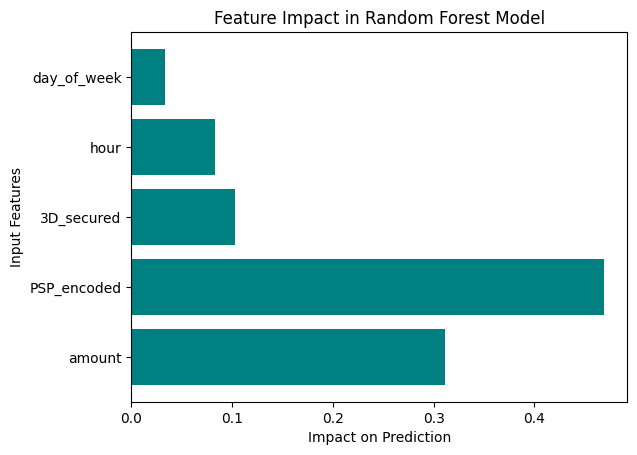

In [35]:
# Visualizing the importance of each feature in the Random Forest model  
feature_importances = best_rf.feature_importances_  
features = X_train.columns  
plt.barh(features, feature_importances,color='teal')  
plt.xlabel("Impact on Prediction")  
plt.ylabel("Input Features")  
plt.title("Feature Impact in Random Forest Model")  
plt.savefig('Feature_Importance_Random_Forest_Model.png')  
plt.show()

# Feature Selection and Model Optimization



In [36]:
# Extracting and displaying the importance of each feature
importances = best_rf.feature_importances_  
feature_names = X.columns

# Sorting features based on their importance in descending order
sorted_indices = importances.argsort()[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices]

# Printing the sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f'{feature}: {importance:.4f}')

# Selecting the top 3 most important features
top_features = sorted_features[:3]
print("\nTop 3 most important features:", top_features)

# Saving the feature importance results to a text file
with open('feature_importance_results.txt', 'w') as f:
    f.write("Feature Importances (sorted):\n")
    for feature, importance in zip(sorted_features, sorted_importances):
        f.write(f"{feature}: {importance:.4f}\n")
    f.write("\nTop 3 most important features:\n")
    for feature in top_features:
        f.write(f"{feature}\n")

PSP_encoded: 0.4689
amount: 0.3112
3D_secured: 0.1029
hour: 0.0834
day_of_week: 0.0335

Top 3 most important features: Index(['PSP_encoded', 'amount', '3D_secured'], dtype='object')


# Re-training Model with Selected Features


In [37]:
# Updating the feature set to include only the top 3 most important features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Re-training the Random Forest model using the selected features
best_rf_selected = RandomForestClassifier(random_state=42)
best_rf_selected.fit(X_train_selected, y_train)

# Making predictions with the new model
y_pred_selected = best_rf_selected.predict(X_test_selected)

# Evaluating the performance of the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"\nAccuracy of Random Forest Model with Top Features: {accuracy_selected * 100:.2f}%")

# Displaying the confusion matrix for the selected features model
print("\nConfusion Matrix for Top Features Model:")
print(confusion_matrix(y_test, y_pred_selected))

print("\nClassification Report for Top Features Model:")
print(classification_report(y_test, y_pred_selected))

# Saving the model evaluation results to a text file
with open('selected_features_evaluation.txt', 'w') as f:
    f.write(f"Accuracy of Random Forest Model with Top Features: {accuracy_selected * 100:.2f}%\n\n")
    f.write("Confusion Matrix for Top Features Model:\n")
    f.write(str(confusion_matrix(y_test, y_pred_selected)) + "\n\n")
    f.write("Classification Report for Top Features Model:\n")
    f.write(classification_report(y_test, y_pred_selected))


Accuracy of Random Forest Model with Top Features: 79.36%

Confusion Matrix for Top Features Model:
[[11781   399]
 [ 2723   220]]

Classification Report for Top Features Model:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12180
           1       0.36      0.07      0.12      2943

    accuracy                           0.79     15123
   macro avg       0.58      0.52      0.50     15123
weighted avg       0.72      0.79      0.74     15123



# Advanced Hyperparameter Tuning with Best Features


In [38]:
# Defining the hyperparameter grid for advanced tuning
param_grid_advanced = {
    'n_estimators': [100, 250, 400, 600],
    'max_depth': [8, 15, 25, None],
    'min_samples_split': [3, 6, 12],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

# Initializing the Random Forest model
rf_advanced = RandomForestClassifier(random_state=42)

# Performing hyperparameter tuning with GridSearchCV
grid_search_advanced = GridSearchCV(estimator=rf_advanced, param_grid=param_grid_advanced, 
                                    cv=5, n_jobs=-1, verbose=2)

# Fitting the model with selected features
grid_search_advanced.fit(X_train_selected, y_train)

# Extracting the best model and parameters
best_rf_advanced = grid_search_advanced.best_estimator_
print(f"Optimal Parameters for Advanced Tuning: {grid_search_advanced.best_params_}")

# Making predictions and evaluating the tuned model
y_pred_advanced = best_rf_advanced.predict(X_test_selected)
accuracy_advanced = accuracy_score(y_test, y_pred_advanced)
print(f"\nAdvanced Tuning Random Forest Model Accuracy: {accuracy_advanced * 100:.2f}%")

# Displaying the confusion matrix for the tuned model
print("\nConfusion Matrix for Tuned Model:")
print(confusion_matrix(y_test, y_pred_advanced))

# Displaying the classification report for the tuned model
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_advanced))

# Saving the tuning results automatically
with open('advanced_tuning_selected_features.txt', 'w') as f:
    f.write(f"Advanced Tuning Random Forest Model Accuracy: {accuracy_advanced * 100:.2f}%\n")
    f.write(f"Optimal Parameters: {grid_search_advanced.best_params_}\n\n")
    f.write("Confusion Matrix for Tuned Model:\n")
    f.write(f"{confusion_matrix(y_test, y_pred_advanced)}\n\n")
    f.write("Classification Report for Tuned Model:\n")
    f.write(f"{classification_report(y_test, y_pred_advanced)}\n")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Optimal Parameters for Advanced Tuning: {'bootstrap': True, 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 12, 'n_estimators': 400}

Advanced Tuning Random Forest Model Accuracy: 80.69%

Confusion Matrix for Tuned Model:
[[12080   100]
 [ 2820   123]]

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     12180
           1       0.55      0.04      0.08      2943

    accuracy                           0.81     15123
   macro avg       0.68      0.52      0.48     15123
weighted avg       0.76      0.81      0.73     15123



# Model Ensemble with Stacking Classifier

In [39]:
# Defining base models for stacking
base_models = [
    ('log_reg', LogisticRegression()),  # Logistic Regression
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),  # Random Forest
    ('dt', DecisionTreeClassifier(random_state=42))  # Decision Tree
]

In [40]:
meta_classifier = LogisticRegression()

In [41]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_classifier, cv=5, n_jobs=-1)


In [42]:
stacking_clf.fit(X_train_selected, y_train)

StackingClassifier(cv=5,
                   estimators=[('log_reg', LogisticRegression()),
                               ('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [43]:
y_pred_stacking = stacking_clf.predict(X_test_selected)

In [44]:
# Evaluating the Stacking Classifier's performance
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"\nStacking Classifier Accuracy: {accuracy_stacking * 100:.2f}%")


Stacking Classifier Accuracy: 80.56%


In [45]:
# Applying SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_selected, y_train)

# Re-training the stacking classifier with the balanced data
stacking_clf.fit(X_train_balanced, y_train_balanced)

# Predicting and evaluating the model on the test set
y_pred_stacking = stacking_clf.predict(X_test_selected)

# Evaluating the performance of the stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"\nAccuracy of Stacking Classifier with Balanced Data: {accuracy_stacking * 100:.2f}%")
print("\nConfusion Matrix for Stacking Classifier with Balanced Data:")
print(confusion_matrix(y_test, y_pred_stacking))

print("\nClassification Report for Stacking Classifier with Balanced Data:")
print(classification_report(y_test, y_pred_stacking))

# Saving the results of the stacking classifier with SMOTE to a text file
with open('stacking_classifier_balanced.txt', 'w') as f:
    f.write(f"Accuracy of Stacking Classifier with Balanced Data: {accuracy_stacking * 100:.2f}%\n\n")
    f.write("Confusion Matrix for Stacking Classifier with Balanced Data:\n")
    f.write(f"{confusion_matrix(y_test, y_pred_stacking)}\n\n")
    f.write("Classification Report for Stacking Classifier with Balanced Data:\n")
    f.write(f"{classification_report(y_test, y_pred_stacking)}\n")


Accuracy of Stacking Classifier with Balanced Data: 60.28%

Confusion Matrix for Stacking Classifier with Balanced Data:
[[7637 4543]
 [1464 1479]]

Classification Report for Stacking Classifier with Balanced Data:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72     12180
           1       0.25      0.50      0.33      2943

    accuracy                           0.60     15123
   macro avg       0.54      0.56      0.52     15123
weighted avg       0.72      0.60      0.64     15123



In [46]:
# Displaying confusion matrix and classification report for the stacking classifier
print("\nConfusion Matrix for Stacking Classifier (Unbalanced):")
print(confusion_matrix(y_test, y_pred_stacking))

print("\nClassification Report for Stacking Classifier (Unbalanced):")
print(classification_report(y_test, y_pred_stacking))

# Saving the stacking classifier results (unbalanced) to a text file
with open('stacking_classifier_unbalanced.txt', 'w') as f:
    f.write(f"Stacking Classifier Accuracy (Unbalanced): {accuracy_stacking * 100:.2f}%\n\n")
    f.write("Confusion Matrix for Stacking Classifier (Unbalanced):\n")
    f.write(f"{confusion_matrix(y_test, y_pred_stacking)}\n\n")
    f.write("Classification Report for Stacking Classifier (Unbalanced):\n")
    f.write(f"{classification_report(y_test, y_pred_stacking)}\n")



Confusion Matrix for Stacking Classifier (Unbalanced):
[[7637 4543]
 [1464 1479]]

Classification Report for Stacking Classifier (Unbalanced):
              precision    recall  f1-score   support

           0       0.84      0.63      0.72     12180
           1       0.25      0.50      0.33      2943

    accuracy                           0.60     15123
   macro avg       0.54      0.56      0.52     15123
weighted avg       0.72      0.60      0.64     15123



# Final Model Evaluation and Comparison

Model Performance Overview:
                            Model  Accuracy  Precision  Recall  F1-Score  \
0             Logistic Regression    0.8054       0.81    1.00      0.89   
1   Advanced tuning Random Forest    0.8069       0.82    0.84      0.89   
2             Stacking Classifier    0.8056       0.81    0.89      0.85   
3  Stacking Classifier (Balanced)    0.6028       0.84    0.63      0.72   

   Recall_Class_1  
0            0.00  
1            0.04  
2            0.50  
3            0.50  


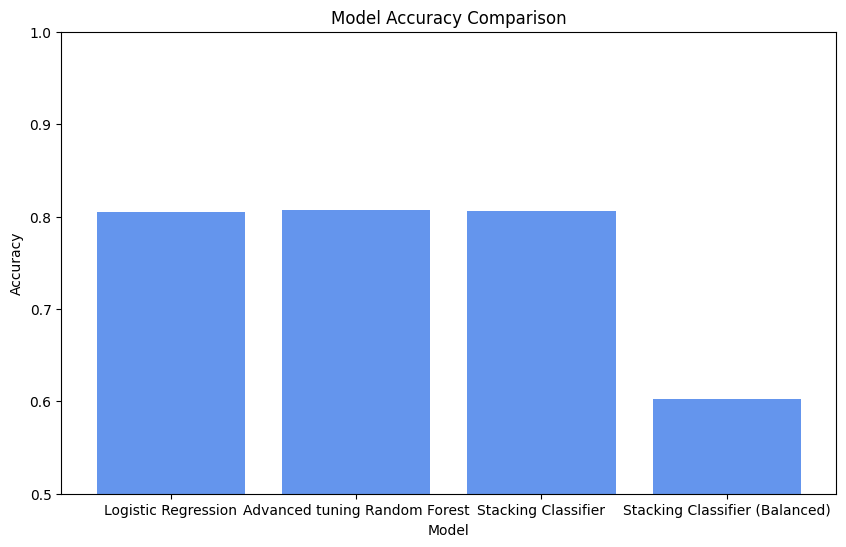

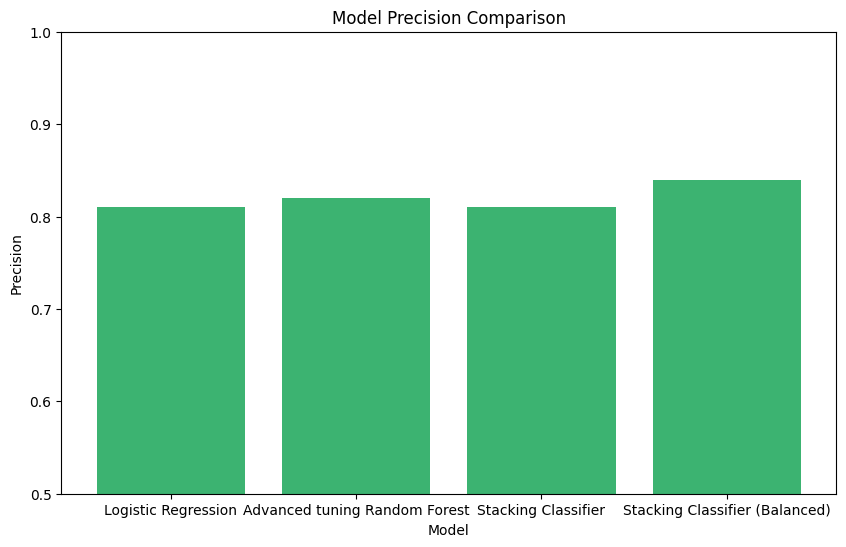

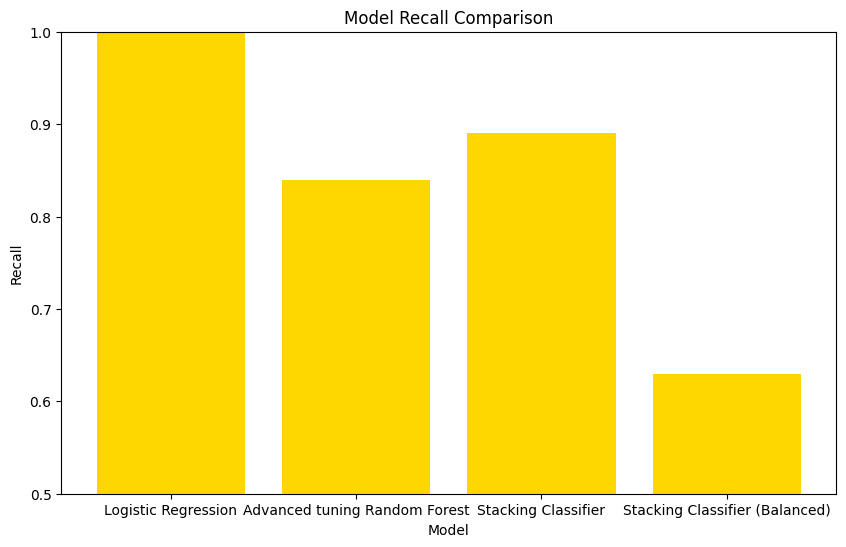

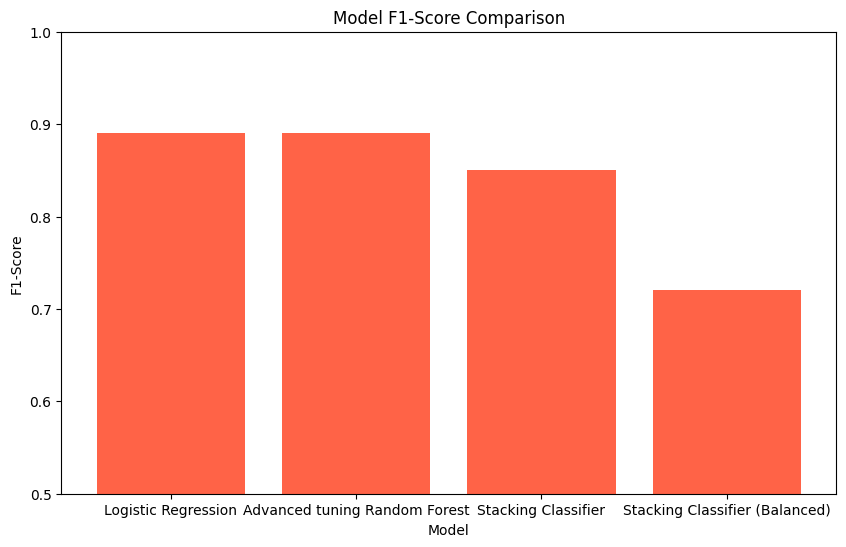

In [ ]:
model_performance = {
    'Model': ['Logistic Regression', 'Advanced tuning Random Forest', 'Stacking Classifier', 
              'Stacking Classifier (Balanced)'],
    'Accuracy': [0.8054, 0.8069, 0.8056, 0.6028],  
    'Precision': [0.81, 0.82, 0.81, 0.84],         
    'Recall': [1, 0.84, 0.89, 0.63],            
    'F1-Score': [0.89, 0.89, 0.85, 0.72],          
    'Recall_Class_1': [0, 0.04, 0.50, 0.50],    
}

performance_df = pd.DataFrame(model_performance)

# Displaying a summary of model performance
print("Model Performance Overview:")
print(performance_df)

# Visualizing model accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['Accuracy'], color='cornflowerblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.show()

# Visualizing model precision comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['Precision'], color='mediumseagreen')
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.5, 1.0)
plt.show()

# Visualizing model recall comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['Recall'], color='gold')
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0.5, 1.0)
plt.show()

# Visualizing model F1-score comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df['Model'], performance_df['F1-Score'], color='tomato')
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0.5, 1.0)
plt.show()

# Saving the model performance summary to a text file
with open('model_performance_summary.txt', 'w') as f:
    f.write("Model Performance Overview:\n\n")
    f.write(performance_df.to_string(index=False))

